## Исследование надёжности заёмщиков
## План выполнения проекта:
### - Загрузка и изучение данных
### -  Предобработка данных:
* Обработка пропусков
* Приведение к нужному типу данных
* Обработка дубликатов
* Лемматизация
* Категоризация данных

### - Ответы на вопросы.
### - Вывод.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
print(data.info()) # применяем метод info() к файлу с данными data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


### Вывод

После открытия файла с данными **data** и применения к нему метода **info()**, видим, что в таблице 21525 строк и 12 столбцов.

В столбце "Общий трудовой стаж в днях" ('days_employed') и столбце "Ежемесячный доход" ('total_income') есть нулевые/пропущенные значения.

Используются типы данных float64(2), int64(5), object(5).   

### Шаг 2. Предобработка данных

### Обработка пропусков

Определим и заполним пропущенные значения.

In [3]:
data[data['days_employed'].isnull()].head() # найдем нулевые значения в стобце 'days_employed'

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [4]:
print(data[data['days_employed'].isnull()].count()) # посчитаем количество пропусков в столбце 'days_employed'

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64


В столбце 'days_employed' обнаружены артефакты - отрицательное количество дней трудового стажа и стаж около 1000 лет. Эти ошибки могли возникнуть при ручном вводе, при ошибке в выгрузке или пересчете стажа. Обрабатывать их не будем, т.к. данные из стобца 'days_employed' для дальнейшей работы нам не нужны. 

In [5]:
data[data['total_income'].isnull()].head() # найдем нулевые значения в стобце 'total_income'

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [6]:
print(data[data['total_income'].isnull()].count())  # посчитаем количество пропусков в столбце 'total_income'

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64


Найдены пропущенные значения в столбце 'total_income'. Проверим случайные ли они, или вдруг пропуски только у какой-то одной категории клиентов по типу занятости. Для этого возьмем срез с пропущенными строками и сравним частоту появлений различных категорий клиентов в нем и во все датасете. 

Используем метод value_counts(normalize=True):

In [7]:
data_total_income_nan = data[data['total_income'].isnull()]
print(data_total_income_nan['income_type'].value_counts(normalize=True))

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64


In [8]:
print(data['income_type'].value_counts(normalize=True))

сотрудник          0.516562
компаньон          0.236237
пенсионер          0.179141
госслужащий        0.067782
предприниматель    0.000093
безработный        0.000093
в декрете          0.000046
студент            0.000046
Name: income_type, dtype: float64


Видим, что пропуски скорее всего случайные, т.к. они одинаково распределены среди всех типов занятости клиентов.

Разобьем клиентов на группы по виду деятельности и присвоим каждой группе свой средний доход.

In [9]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [10]:
for i in data['income_type'].unique():
    total_income_mediana = data.loc[data['income_type']==i, 'total_income'].median()
    data.loc[data['income_type']==i, 'total_income'] = data.loc[data['income_type']==i, 'total_income'].fillna(total_income_mediana)
    print(total_income_mediana) # посмотрим какая медиана по уровню дохода по группам

142594.39684740017
118514.48641164352
172357.95096577113
150447.9352830068
131339.7516762103
499163.1449470857
98201.62531401133
53829.13072905995


Действительно, разбить клиентов на группы по виду деятельности и присвоить каждой группе свой средний доход более корректно, чем всем присвоить 145000.

In [11]:
print(data[data['total_income'].isnull()]) # проверяем не осталось ли пропусков
print()
print(data[data['total_income'].isnull()].count()) # еще раз проверяем не осталось ли пропусков

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


В столбцах 'days_employed' и 'total_income' найдены пропуски в количественных переменных. 
В 2174 стоках стоит значение NaN, т.е. не указан доход и стаж почти у 10% клиентов. Это достаточно много, поэтому просто удалить эти строки нельзя, нужно их заполнить на основе имеющихся данных. Заметим также, что строки с пропущенными значениями в столбце 'days_employed' совпадают со строками в столбце 'total_income'.
    
Возможными причинами появления пропусков в данных могут быть: 
    - некорректная загрузка или выгрузка данных
    - человеческий фактор - допущение ошибки при ручном вводе данных
    - пользователь не указал о себе эти сведения
    - автоматизированная система сбора информации дала сбой

Так как мы нашли пропуски в количественных переменных, то будем их заполнять характерными значениями. Для этого посчитаем **медиану**.  
Стаж ('days_employed') для дальнейшего анализа нам не нужен, поэтому оставим этот столбец как есть.  
Для пропусков в 'total_income' посчитаем медиану и заполним пропуски этим значением. 
Можно изучить зависимостть дохода от типа занятости или например, от уровня образования и пересчитать медиану по-другому.

### Замена типа данных

В столбцах 'days_employed' и 'total_income' вещественный тип данных. Стаж 'days_employed' не трогаем, так как он не нужен для дальнейших расчетов. Заменим вещественный тип данных на целочисленный в столбце 'total_income'.

In [12]:
data['total_income'] = data['total_income'].astype('int') # меняем тип данных в столбце 'total_income' на integer
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Переводим значения в столбце 'total_income' в целочисленный тип методом **astype()**. Этот метод переводит значения в нужный тип.
Значения в столбце 'days_employed' не меняем, так как они не нужны для дальнейшей работы.

### Обработка дубликатов
Найдем и удалим дубликаты. 

##### Найдем дубликаты в столбце 'education':

In [13]:
print(data['education'].value_counts()) # найдем дубликаты в столбце 'education'.

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64


Найдены дубликаты в столбце 'education', отличающиеся регистром. Чтобы учесть такие дубликаты, все символы в строке приводим к нижнему регистру:

In [14]:
data['education'] = data['education'].str.lower() # приводим все символы в строке к нижнему регистру
print(data['education'].value_counts()) # проверяем

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


В  столбце 'education' теперь нет дубликатов.
##### Найдем дубликаты в столбце 'family_status':

In [15]:
print(data['family_status'].value_counts()) # найдем дубликаты в столбце 'family_status'

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


 Дубликатов в столбце 'family_status' нет, но есть разный регистр. Исправим это:

In [16]:
data['family_status'] = data['family_status'].str.lower() # приведем все строки к нижнему регистру
print(data['family_status'].value_counts()) # проверяем

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


##### Найдем дубликаты в столбце 'gender':

In [17]:
print(data['gender'].value_counts()) # найдем дубликаты в столбце 'gender'

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


 Дубликатов в столбце 'gender' нет, но есть значение XNA в одной строке, можно ее удалить при желании.

##### Найдем дубликаты в столбце 'income_type':

In [18]:
print(data['income_type'].value_counts()) #  найдем дубликаты в столбце 'income_type'

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64


Дубликатов в столбце 'income_type' нет.
##### Найдем дубликаты в столбце 'purpose':

In [19]:
print(data['purpose'].value_counts()) # найдем дубликаты в столбце 'purpose'

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

 В столбце 'purpose' одна и та же цель кредита написана разными способами, например, "свадьба" и "на проведение свадьбы". Исправить это можно с помощью лемматизации.

##### Найдем и удалим полные дубликаты:

In [20]:
data = data.drop_duplicates().reset_index(drop = True)

In [21]:
data.duplicated().sum()  # проверим не остались ли дубликаты

0

Для поиска и удаления дубликатов был выбран метод **value_counts()**, который анализирует столбец, выбирает каждое уникальное значение и подсчитывает частоту его встречаемости в списке. Он удобен тем, что результат его работы - список пар "значение - частота повторений", отсортированный по убыванию количества дубликатов. 

Причинами появления дубликатов могут бытьмчеловеческий фактор, одну и ту же цель кредита можно описать разными словами. Например "свадьба" и "на проведение свадьбы", также одно и тоже слово можно написать в разном регистре, "ВЫСШЕЕ" и "высшее".

### Лемматизация

Сделаем автоматический поиск **лемм**.

Для этого выделим список уникальных целей кредита методом **unique()**:

In [23]:
purpose_unique = data['purpose'].unique()
print(purpose_unique)

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Склеим список в одну строку:

In [24]:
purpose_unique_str = ' '.join(purpose_unique) 
print(purpose_unique_str)

покупка жилья приобретение автомобиля дополнительное образование сыграть свадьбу операции с жильем образование на проведение свадьбы покупка жилья для семьи покупка недвижимости покупка коммерческой недвижимости покупка жилой недвижимости строительство собственной недвижимости недвижимость строительство недвижимости на покупку подержанного автомобиля на покупку своего автомобиля операции с коммерческой недвижимостью строительство жилой недвижимости жилье операции со своей недвижимостью автомобили заняться образованием сделка с подержанным автомобилем получение образования автомобиль свадьба получение дополнительного образования покупка своего жилья операции с недвижимостью получение высшего образования свой автомобиль сделка с автомобилем профильное образование высшее образование покупка жилья для сдачи на покупку автомобиля ремонт жилью заняться высшим образованием


Лемматизируем:

In [25]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(purpose_unique_str)
print(lemmas)

['покупка', ' ', 'жилье', ' ', 'приобретение', ' ', 'автомобиль', ' ', 'дополнительный', ' ', 'образование', ' ', 'сыграть', ' ', 'свадьба', ' ', 'операция', ' ', 'с', ' ', 'жилье', ' ', 'образование', ' ', 'на', ' ', 'проведение', ' ', 'свадьба', ' ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', ' ', 'покупка', ' ', 'недвижимость', ' ', 'покупка', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'покупка', ' ', 'жилой', ' ', 'недвижимость', ' ', 'строительство', ' ', 'собственный', ' ', 'недвижимость', ' ', 'недвижимость', ' ', 'строительство', ' ', 'недвижимость', ' ', 'на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', ' ', 'на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', ' ', 'операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'строительство', ' ', 'жилой', ' ', 'недвижимость', ' ', 'жилье', ' ', 'операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', ' ', 'автомобиль', ' ', 'заниматься', ' ', 'образование', ' ', 'сделка', ' ', 'с', ' ', 'подержать

Считаем какие леммы встречаются чаще других:

In [26]:
from collections import Counter
print(Counter(lemmas))

Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


Можно выделить следующие цели кредита - 'свадьба', 'недвижимость', 'жилье', 'автомобиль', 'образование'.

Заменим этими значениями длинные строки в столбце с целями кредита.

In [27]:
def groupped_purpose(purpose):       
    purposes = ['свадьба', 'недвижимость', 'жилье', 'автомобиль', 'образование']
    lemmas = m.lemmatize(purpose)
    for lemma in lemmas:                      
        if lemma in purposes:
            return lemma
data['purpose'] = data['purpose'].apply(groupped_purpose)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,жилье
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,жилье
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,жилье


In [28]:
print(data['purpose'].value_counts())  # проверяем

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose, dtype: int64


В столбце с целями кредита, одна и та же цель была написана в разной форме, для приведения каждой цели к одной словарной форме была использована лемматизация. Для этого была написана функция **groupped_purpose()**,  с помощью которой мы сгруппировали цели кредита по ключевым словам из списка purposes = ['свадьба', 'недвижимость', 'жилье', 'автомобиль', 'образование']


### Категоризация данных
Категоризируем данные:

    - По количеству детей
    - По семейному положению
    - По уровню дохода
    - По целям кредита
    
    

##### Классифицируем по количеству детей. 
Для этого воспользуемся методом **value_counts()**, чтобы посмотреть количество клиентов с соответсвующим количеством детей.

In [29]:
print(data['children'].value_counts())

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Для дальнейшего анализа нужна категоризация — объединение данных в категории. Так же обнаружены артефакты - количество детей "-1" и "20". Скорее всего они могли появиться при ошибке ручного ввода. Так что можно заменить "-1" на "1" и "20" на "2", к тому же клиентов со значением "-1" и "20" в стобце дети не много.

In [30]:
data['children'] = data['children'].replace(-1, 1)
data['children'] = data['children'].replace(20, 2)
print(data['children'].value_counts())

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64


Распределим клиентов так:

    - Клиенты с количеством детей "0" попадают в категорию «нет детей»
    - Клиенты с количеством детей от 1 до 2  — категория «есть дети» 
    - Клиенты с количеством детей больше 3 принадлежат к категории «многодетные»

Запишем правила классификации клиентов как функцию.

In [31]:
def children_group(qty):
    if qty == 0:
        return 'нет детей'
    if 1 <= qty <= 2:
        return 'есть дети'
    if qty >= 3:
        return 'многодетные '
    
data['children_group'] = data['children'].apply(children_group)
data.head()   

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,есть дети
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,есть дети
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье,нет детей
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,многодетные
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,нет детей


Выведем статистику по количеству детей в группе методом value_counts():

In [32]:
print(data['children_group'].value_counts())

нет детей       14091
есть дети        6983
многодетные       380
Name: children_group, dtype: int64


В таком виде данные подходят для анализа зависимости между наличием детей и возвратом кредита в срок.

##### Категоризация по семейному положению.
Во входных данных уже есть категоризация по семейному положению. Имеется «словарь», где названию категории соответствует номер. Далее можно обращаться уже не к длинной строке, а к её числовому обозначению.

In [33]:
print(data['family_status_id'].value_counts()) 

0    12339
1     4151
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64


In [34]:
print(data['family_status'].value_counts())

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


##### По уровню дохода.

Для этого воспользуемся методом value_counts(), чтобы посмотреть количество клиентов с соответсвующим уровнем дохода.

In [35]:
print(data['total_income'].value_counts())

142594    1070
172357     502
118514     387
150447     145
126262       3
          ... 
101387       1
138249       1
280240       1
390148       1
264193       1
Name: total_income, Length: 18608, dtype: int64


Такими данными не удобно пользоваться для дальнейшего анализа. Проведем категоризацию данных. 

Распределим уровень дохода так:

    - Клиенты с уровнем дохода меньше 50000 попадают в категорию «<=50000»
    - Клиенты с уровнем дохода от 50000 до 100000 попадают в категорию «50000-100000»
    - Клиенты с уровнем дохода от 100000 до 200000 попадают в категорию «100000-200000»
    - Клиенты с уровнем дохода от 200000 до 500000 попадают в категорию «200000-500000»
    - Клиенты с уровнем дохода от 500000 до 1000000 попадают в категорию «500000-1000000»
    - Клиенты с уровнем дохода больше 1000000 попадают в категорию «>=1000000»

Запишем правила классификации клиентов как функцию.

In [36]:
def total_income_group(income):
    if income <= 50000:
        return '<=50000'
    if 50000 <= income <= 100000:
        return '50000-100000'
    if 100000 <= income <= 200000:
        return '100000-200000'
    if 200000 <= income <= 500000:
        return '200000-500000'
    if 500000 <= income <= 1000000:
        return '500000-1000000'
    if income >= 1000000:
        return '>=1000000'
    
data['total_income_group'] = data['total_income'].apply(total_income_group)
data.head()   

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_group,total_income_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,есть дети,200000-500000
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,есть дети,100000-200000
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье,нет детей,100000-200000
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,многодетные,200000-500000
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,нет детей,100000-200000


Выведем статистику по уровню дохода в группе методом value_counts():

In [37]:
print(data['total_income_group'].value_counts())

100000-200000     11924
200000-500000      4845
50000-100000       4091
<=50000             372
500000-1000000      197
>=1000000            25
Name: total_income_group, dtype: int64


В таком виде данные подходят для анализа зависимости между уровнем дохода и возвратом кредита в срок.

##### По целям кредита.

In [38]:
print(data['purpose'].value_counts())

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose, dtype: int64


Эти данные и так удуобно анализировать, можно дополнительно не категоризовать.

Была поизведена категоризация данных по количеству детей. Данные сгруппированы на категории: "нет детей","есть дети","многодетные".

Категоризация по семейному положению не потребовалась, во входных данных словарь уже есть.

Категоризация по уровню дохода, была произведена группированием дохода следующим образом: «<=50000», «50000-100000», «50000-100000», «200000-500000», «500000-1000000», «>=1000000».

### Шаг 3. Ответьте на вопросы

#### - Есть ли зависимость между наличием детей и возвратом кредита в срок?

Посчитаем долю должников по группам.

In [39]:
data.groupby('children_group')['debt'].agg(['mean', 'count'])

,mean,count
children_group,,
есть дети,0.092654,6983
многодетные,0.081579,380
нет детей,0.075438,14091


Построим для наглядности:

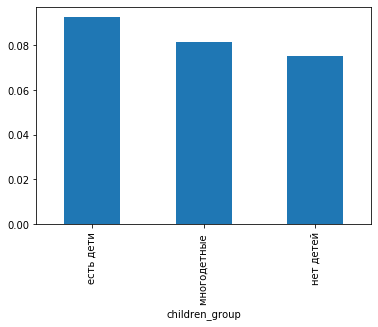

In [40]:
data.groupby('children_group')['debt'].mean().plot(kind='bar') 

Применим **сводную таблицу** и заодно проверим другим методом:

In [41]:
data_pivot = data.pivot_table(index='children_group', values='debt')
data_pivot

,debt
children_group,
есть дети,0.092654
многодетные,0.081579
нет детей,0.075438


Да, получены такие же данные.

### Вывод

В группе клиентов, у которых есть дети процент должников самый большой 9%.  У многодетных (больше 3 детей)  8%

У клиентов без детей процент должников - 7% 

Т.е. в целом процент должников больше у клиентов с детьми. Чаще люди, у которых нет детей возвращают кредит в срок, чем люди у которых есть дети.

#### - Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [42]:
data.groupby('family_status')['debt'].agg(['mean', 'count'])

,mean,count
family_status,,
в разводе,0.071130,1195
вдовец / вдова,0.065693,959
гражданский брак,0.093471,4151
женат / замужем,0.075452,12339
не женат / не замужем,0.097509,2810


Построим для наглядности:

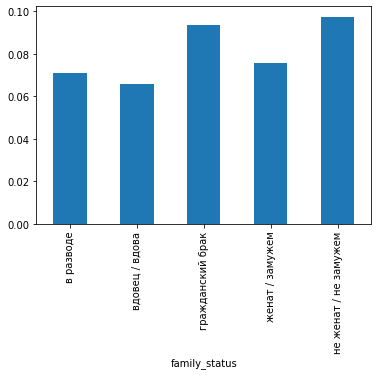

In [43]:
data.groupby('family_status')['debt'].mean().plot(kind='bar') 

Применим **сводную таблицу** и заодно проверим другим методом:

In [44]:
data_pivot = data.pivot_table(index='family_status', values='debt')
data_pivot

,debt
family_status,
в разводе,0.071130
вдовец / вдова,0.065693
гражданский брак,0.093471
женат / замужем,0.075452
не женат / не замужем,0.097509


### Вывод

Самый большой процент должников почти 10% у не женатых/ не замужних. Дальше идут люди в гражданском браке - 9% должников.
У женатых 7,5%. В разводе -  7%. У вдовцов 6%.
Т.е. можно сказать, что да, есть зависимость между семейным положением и возвратом кредита в срок. 

#### - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посчитаем долю должников по группам.

In [45]:
data.groupby('total_income_group')['debt'].agg(['mean', 'count'])  

,mean,count
total_income_group,,
100000-200000,0.086297,11924
200000-500000,0.071001,4845
50000-100000,0.080909,4091
500000-1000000,0.060914,197
<=50000,0.061828,372
>=1000000,0.080000,25


Построим для наглядности:

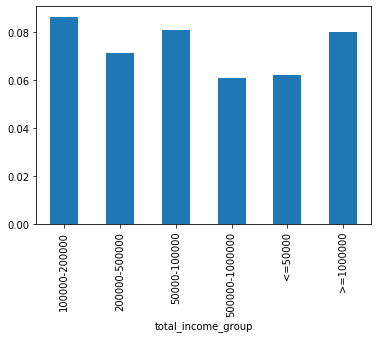

In [46]:
data.groupby('total_income_group')['debt'].mean().plot(kind='bar') 

Применим **сводную таблицу** и заодно проверим другим методом:

In [47]:
data_pivot = data.pivot_table(index='total_income_group', values='debt')
data_pivot

,debt
total_income_group,
100000-200000,0.086297
200000-500000,0.071001
50000-100000,0.080909
500000-1000000,0.060914
<=50000,0.061828
>=1000000,0.080000


### Вывод

Больше всего должников с уровнем зарплаты от 100000 до 200000 - 8,5%.

Меньше всего должников у  клиентов с зарплатой 20000 - 50000 - 6%


#### - Как разные цели кредита влияют на его возврат в срок?

In [48]:
data.groupby('purpose')['debt'].agg(['mean', 'count'])  

,mean,count
purpose,,
автомобиль,0.093590,4306
жилье,0.069058,4460
недвижимость,0.074634,6351
образование,0.092200,4013
свадьба,0.080034,2324


Построим для наглядности:

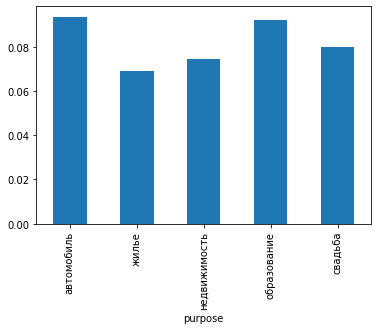

In [49]:
data.groupby('purpose')['debt'].mean().plot(kind='bar') 

Применим **сводную таблицу** и заодно проверим другим методом:

In [50]:
data_pivot = data.pivot_table(index='purpose', values='debt')
data_pivot

,debt
purpose,
автомобиль,0.093590
жилье,0.069058
недвижимость,0.074634
образование,0.092200
свадьба,0.080034


### Вывод

Больше всего должников среди тех кто берет кредит на образование 9%.
Меньше  среди тех, кто берет на жилье и недвижимость 6% и 7%.

### Шаг 4. Общий вывод

Мы изучили и выяснили, что влияет на возврат кредита в срок.

    - *Цели кредита*. Когда люди из данной выборки берут кредит на жилье и недвижимость, они чаще возвращают кредит в срок, чем если берут кредит на обучение или автомобиль. Возможно, потому что кредит на жилье намного больше и относятся к нему более ответственно. И более точно оценили свои возможности по погашению кредита.
    - *Уровень дохода*. Удивительно, но люди с самым маленьким доходом из данной выборки чаще остальных возвращают кредит в срок.
    - *Семейное положение*. Клиенты не женатые/не замужние или в гражданском браке менее надежные заемщики.
    - *Наличие детей*. Клиенты без детей реже бывают в должниках, чем те у кого есть дети.